(how-to-notebook)=

# How to add a notebook to the documentation


<div align="right"><i>By: <a href="mailto:j.gobeil@nikhef.nl">Jeremie Gobeil</a></br>Last update: 19 Nov. 2025</i></div>


So, you have a [Jupyter](https://jupyter.org/) notebook with beautiful {{Finesse}} examples, physics explanations, tutorials or anything that could improve the {{Finesse}} website, and you would like to add it to the documentation. Great! Here's how to do it.


## Before starting, some info

```{important}
This guide is intended for people with developer access to the {{Finesse}} GitLab repository. If this is not the case, please contact us to see if we can take care of adding the page ourselves. You can also [fork](https://docs.gitlab.com/user/project/repository/forking_workflow/) the {{Finesse}} repository and create your [merge request](https://docs.gitlab.com/user/project/merge_requests/creating_merge_requests/#when-you-work-in-a-fork) from there. In all cases, please adapt the following workflow to your situation and needs.
```

```{attention} I don't have a development environment for {{Finesse}} ...

{ref}`dev_get_started`
```

- {{Finesse}} uses [Sphinx](https://www.sphinx-doc.org/) to generate its documentation. The [MyST-NB](https://myst-nb.readthedocs.io) extension enables Jupyter notebooks to be used as a documentation page. The notebooks need to be written in the [MyST](https://mystmd.org/) language, but no worries, MyST is a superset of [CommonMark](https://commonmark.org/), the Markdown variant used in the Jupyter notebook markdown cells. This means that MyST-NB will understand everything that you would write in a standard Jupyter notebook, and more; no need to change your text or code. MyST also gives you access to new ways to display information that are not available with CommonMark. A quick syntax guide to MyST is provided at the end of this page in {ref}`sec:annex-mystref`. 
- The notebook that generates this page is located in the {{Finesse}} source code directory at [docs/source/developer/how-to-notebook.ipynb](https://gitlab.com/ifosim/finesse/finesse3/-/blob/develop/docs/source/developer/how-to-notebook.ipynb). You can make a copy to use as a template or look at the source code to understand how it works.
- To ensure quality and consistency of the documentation, your notebook will be reviewed before being added to the documentation.
- MyST-NB provides a plugin for JupyterLab that activates some MyST formatting. Search "jupyterlab-myst" in the extension manager (in the left sidebar or in the `View` menu of JupyterLab).

## Step 0: Discuss your plan

Before starting the endeavour of creating a new page for the documentation, discuss with the {{Finesse}} team to see if, and where, your page could be added to the documentation, the scope of the document, and if we can help at any step of the process.
To communicate with us, you can:
- Join [The Finesse room on Matrix](https://matrix.to/#/#finesse:matrix.org) (preferred way)
- Send an email to `finesse-support AT nikhef.nl`

## Step 1. Write your notebook

```{tip}

JupyterLab and the jupyterlab-myst extension are installed by default in the {{Finesse}} environment named `finesse3-env` (see: {ref}`dev_get_started`).
```
    
1. Make sure your notebook is complete and correctly formatted: 

   - Use sections and subsections, defined by headings of appropriate levels, to structure your document.
   - Add descriptions and explanations in Markdown cells.
   - Make sure your figures are correctly labelled and easy to read.
   - Make your code understandable, with comments and docstrings when relevant.
   - Remove any bugs in your code. The whole notebook should run without exception (or at least without uncaught exceptions).

2. Modify the notebook so that it is coherent and can be integrated with the rest of the documentation:
    
   - **Write a title**: If it is not already done, add a title to your page using the markdown notation "# title". That will be the name displayed in the table of contents and other references.
   - **Write a label**: To allow your document to be referenced, you need to add a label before the title (or before any sections that you want to be able to reference). Use a label that will be unique and descriptive (the name of the file could be a valid option). To write a label, write something like `(my-label)=` in a Markdown cell, before the section title.
   - **Add authors and date**: Write your name(s) as author(s) and the date. This will allow any questions to be directed to the right person and determine if the information may be outdated.
   - **Add internal references**: Add/rewrite links to internal {{Finesse}} resources using references. see: {ref}`sec:labels-and-references`
   - **Replace the word "Finesse" with "\{\{Finesse\}\}"**. This will activate the standard {{Finesse}} word formatting.
   - **If relevant, add download links**: If you want to allow the page to be downloaded as a script or notebook, you need to write in a markdown cell something like (write the proper notebook filename), ideally at the bottom of the page:
       ```markdown
       {jupyter-download-script}`Download this page as Python script <how-to-notebook>`
       
       {jupyter-download-nb}`Download this page as Jupyter notebook <how-to-notebook>`
        ```
        resulting in 
        
       {jupyter-download-script}`Download this page as Python script <how-to-notebook>`
     
       {jupyter-download-nb}`Download this page as Jupyter notebook <how-to-notebook>`
   - **Be careful with the size and runtime of your notebook**: For practical reasons, we cannot add notebooks that take too long to run (high maxtem for example) or are too big (plot with really high dpi for example).

## Step 2. Create your git branch from an up-to-date development branch

```{note} We assume the current setup

- You have access and know how to use a [command line interface](https://en.wikipedia.org/wiki/Command-line_interface)(CLI)
- You are either under Linux, MacOS, or [Windows Subsystem for Linux (WSL)](https://learn.microsoft.com/en-us/windows/wsl/about)
- Your copy of the git repository is located at: `$HOME/finesse3`
- `git` and `mamba` software are accessible from your CLI
- Your mamba environment is named `finesse3-env`

Please adapt the instructions if this does not correspond to your situation.
```

1. **Move to the {{Finesse}} docs directory.** `cd $HOME/finesse3/docs`
2. **Update the `develop` branch.** `git switch develop && git pull`
3. **Activate the development environment.** `mamba activate finesse3-env`
4. (Optional - see the note below) **Build the documentation.** `make html`.

   You can consult the documentation by opening with a browser the file `$HOME/finesse3/docs/build/html/index.html`.
6. **Create and switch to a new branch.** The new branch should begin with "doc/". `git switch -c <doc/a-relevant-name-for-my-branch>`

**You should now have:**
- ✔ An active `finesse3-env` environment,
- ✔ A checked out new git branch named `doc/<a-relevant-name-for-my-branch>` based on the develop branch (use [`git status`](https://git-scm.com/docs/git-status) to know the active branch).
- ✔ Your working directory set to `$HOME/finesse3/docs/`.
- ✔ (Optional) An up-to-date version of the documentation (located in `$HOME/finesse3/docs/build/html`),

```{note}

The initial local build of the documentation can take several minutes to complete. The subsequent builds should be faster. You may need to build from a clean state (after a `make clean`) from time to time, when the build doesn't complete properly.

If you choose not to build the documentation locally, you can inspect your page after creating a merge request at step 4 inside the artefacts of the merge request pipeline on GitLab. Please note that the pipeline can take over 40 minutes to complete and that the documentation building process must be initiated manually.

More about the build process there: {ref}`documenting-how-to-build`.
```


## Step 3. Add your notebook to the documentation

1. **Copy your notebook to its final destination in `$HOME/finesse3/docs/source/*`.** The directory hierarchy follows the same hierarchy as the documentation table of contents. 
2. **Add your page to the table of contents.** Write the relative path to your notebook, without the extension (_i.e._ no `.ipynb`), in the relevant `index.rst` file. This will add your page to the table of contents of this section. If you don't add it to an index, your page will only be reachable via the search function.
3. (Optional) **Build the documentation.** Run `make html` and look at the results by opening with a browser the file `$HOME/finesse3/docs/build/html/index.html`.

**You should now have:**
- ✔ a version of the documentation that includes your new page.

## Step 4. Create a merge request

1. **Add your document(s) to your `git` branch.** `git add path/to/my.ipynb` (don't forget also to add any images or files needed to generate your page).
2. **Commit your work.** `git commit`. Write a short commit message explaining the commit.
3. **Push your branch to GitLab.** `git push origin <doc/a-relevant-name-for-my-branch>`
4. **Create a new merge request targeting the develop branch.** If the push was successful, a link to create a new merge request will be present in the server response. You can also [make a merge request via the GitLab website](https://gitlab.com/ifosim/finesse/finesse3/-/merge_requests/new). 
5. **Fill in the information for the merge request**.

**You should now have**
- ✔ an active merge request waiting for review.


```{tip}

- You can commit to your local branch as often as you want to track your changes, save your work or if you need to change branches.
- You can use `git commit -a` to automatically commit all modifications on tracked files without needing to use `git add` on each file at every commit. Be careful not to add unwanted modifications.
- Use `git status` to see which branch is active, the modified files, and more.
- Use `git diff` to see the modified lines since your last commit.
```

## Step 5. Your merge request is reviewed

You can find and consult your merge request at [Finesse merge requests](https://gitlab.com/ifosim/finesse/finesse3/-/merge_requests). You should also receive emails about comments and modifications of your merge request.

We may ask that you correct some things on your page. If so

1. **Make sure your branch is active.** `git switch <doc/a-relevant-name-for-my-branch>`
2. **Modify your file.**
3. (Optional) **Build the documentation and inspect the result.** `make html` and open with a browser `$HOME/finesse3/docs/build/html/index.html`
4. **Commit your changes.** `git commit -a`. Write a short commit message explaining the commit.
5. **Push the modification.** `git push origin <doc/a-relevant-name-for-my-branch>`
6. **Answer the threads on your merge request.** All threads (merge request discussions/questions/corrections) need to be resolved before merging.


## Step 6. Your page is accepted and merged
✔ Done. **Thank you for contributing to the Finesse documentation!**

---

(sec:annex-mystref)=

## Annexe: Quick MyST reference

In this section, we quickly present some features that you can utilise with MyST. The intended use is a quick reference when writing. Some examples are extracted from the [JupyterBook cheatsheet](https://jupyterbook.org/en/stable/reference/cheatsheet.html).

For more information about writing your document with MyST consults the [MyST documentation](https://myst-parser.readthedocs.io/en/latest/syntax/typography.html)

### Headers

```md
# Heading level 1
## Heading level 2
### Heading level 3
#### Heading level 4
##### Heading level 5
###### Heading level 6
```

(sec:labels-and-references)=

### Labels and references

Label sections with `(target_label)=` before the header to enable referencing them.

Reference with:
``````{list-table}
:header-rows: 1
:widths: 15 15

* - Syntax
  - Result
* - ```md
    {ref}`sec:labels-and-references`
    ```
  - {ref}`sec:labels-and-references`
* - ```md
    {ref}`Custom text <sec:labels-and-references>`
    ```
  - {ref}`Custom text <sec:labels-and-references>`
``````

#### Additional cross-reference support

**Examples**

```md
- Module: {mod}`finesse.components`
- Class: {class}`finesse.components.cavity.Cavity`
- Function: {func}`finesse.model.Model.path`
- Attribute: {attr}`finesse.model.Model.detectors`
- kat-script command: {kat:command}`link`
- kat-script element: {kat:element}`mirror`
- kat-script analysis: {kat:analysis}`xaxis`
- GitLab issue: {issue}`601`
- Source file: {source}`docs/source/developer/how-to-notebook.ipynb`
```

**Results**
- Module: {mod}`finesse.components`
- Class: {class}`finesse.components.cavity.Cavity`
- Function: {func}`finesse.model.Model.path`
- Attribute: {attr}`finesse.model.Model.detectors`
- kat-script command: {kat:command}`link`
- kat-script element: {kat:element}`mirror`
- kat-script analysis: {kat:analysis}`xaxis`
- GitLab issue: {issue}`601`
- Source file: {source}`docs/source/developer/how-to-notebook.ipynb`




### Citations

```{important}
Add the publication that you want to cite, if new, in the .bib file [docs/source/zbiblio/refs.bib](https://gitlab.com/ifosim/finesse/finesse3/-/blob/develop/docs/source/zbiblio/refs.bib). 
```

``````{list-table}
:header-rows: 1
:widths: 10 10

* - Example
  - Result
* - ```md
    A good paper to read {cite}`amaldi03_freise`.
    ```
  - A good paper to read {cite}`amaldi03_freise`.
``````

### Horizontal lines

---

Write a horizontal line with `---`.

---

### Links

``````{list-table}
:header-rows: 1
:widths: 20 20

* - Example
  - Result
* - ```md
    [Finesse 3](https://finesse.ifosim.org)
    ```
  - [Finesse 3](https://finesse.ifosim.org)
* - ```md
    <https://finesse.ifosim.org/>
    ```
  - <https://finesse.ifosim.org/>
``````

### Tables

More info: [MyST documentation - Tables](https://myst-parser.readthedocs.io/en/latest/syntax/tables.html)

``````{list-table}
:header-rows: 1
:widths: 20 20

* - Example
  - Result
* - ```md
    |    Training   |   Validation   |
    | :------------ | -------------: |
    |        0      |        5       |
    |     13720     |      2744      |
    ```
  - |    Training   |   Validation   |
    | :------------ | -------------: |
    |        0      |        5       |
    |     13720     |      2744      |
* - ````md
    ```{list-table} This table title
    :header-rows: 1
    :name: example-table

    * - Training
      - Validation
    * - 0
      - 5
    * - 13720
      - 2744
    ```
    ````
  - ```{list-table} This table title
    :header-rows: 1
    :name: example-table

    * - Training
      - Validation
    * - 0
      - 5
    * - 13720
      - 2744
    ```
``````

### Figures and images

More info: [Myst documentation - Images and figures](https://myst-parser.readthedocs.io/en/latest/syntax/images_and_figures.html)

#### Example
````md
```{figure} ../images/andreas_daniel_left_handed_small.jpg
:alt: Left-handed coordinate system
:height: 150px
:name: andreas_daniel_left_handed
:target: coordinate-systems
:align: center

Andreas and Daniel showing left-handed coordinate systems.
```
````

#### Result

```{figure} ../images/andreas_daniel_left_handed_small.jpg
:alt: Left-handed coordinate system
:height: 150px
:name: andreas_daniel_left_handed
:target: coordinate-systems
:align: center

Andreas and Daniel showing left-handed coordinate systems.
```

### Mathematical equations

``````{list-table}
:header-rows: 1
:widths: 10 20 20

* - Syntax
  - Example
  - Result
* - Inline
  - ```md
    This is an example of an
    inline equation $z=\sqrt{x^2+y^2}$.
    ```
  - This is an example of an
    inline equation $z=\sqrt{x^2+y^2}$.
* - Math blocks
  - ```md
    This is an example of a
    math block

    $$
    z=\sqrt{x^2+y^2}
    $$
    ```
  - This is an example of a
    math block

    $$
    z=\sqrt{x^2+y^2}
    $$
* - Math blocks with labels
  - ```md
    This is an example of a
    math block with a label

    $$
    z=\sqrt{x^2+y^2}
    $$ (mylabel)
    ```
  - This is an example of a
    math block with a label

    $$
    z=\sqrt{x^2+y^2}
    $$ (mylabel)
* - Math directives
  - ````md
    This is an example of a
    math directive with a
    label
    ```{math}
    :label: eq-label

    z=\sqrt{x^2+y^2}
    ```
    ````
  - This is an example of a
    math directive with a
    label
    ```{math}
    :label: eq-label

    z=\sqrt{x^2+y^2}
    ```
``````

#### Referencing math directives

``````{list-table}
:header-rows: 1
:widths: 15 20

* - Example
  - Result
* - ```md
    Check out equation {eq}`eq-label`.
    ```
  - Check out equation {eq}`eq-label`.
``````

### Executing code

What is in a `Code` cell will be executed, and any output displayed.

In [1]:
# This is an example of some code

def do_some_calculation(a: float) -> float:
    """ Using typing and docstrings helps readers to understand what 
    your code does."""
    return a * a * a
n = 12
print(f"The cube of {n} is {do_some_calculation(n)}.")

The cube of 12 is 1728.


```{tip}
All the code cells of a page are run in the same Python instance, one after the other, meaning that you can use previous code in the following cells.
```

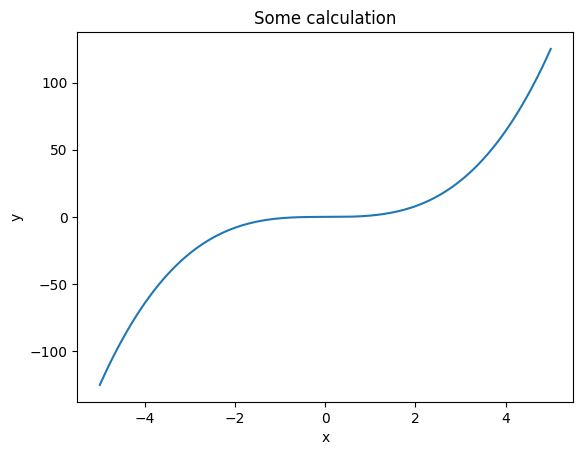

In [2]:
# Plotting example 

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = np.linspace(-5, 5, 201)
y = do_some_calculation(x)
ax.plot(x, y)
ax.set_xlabel("x"); ax.set_ylabel("y");
ax.set_title("Some calculation"); # The ';' will prevent the display of the object returned by the function

### Admonitions

``````{list-table}
:header-rows: 1
:widths: 10 10

* - Example
  - Result
* - ````md
    ```{note} 
    This is an example of a note.
    ```
    ````
  - ```{note} 
    This is an example of a note.
    ```
``````
#### Admonitions available


```{note}
...
```

```{warning}
...
```

```{tip}
...
```

```{caution}
...
```

```{attention}
...
```

```{danger}
...
```

```{hint}
...
```

```{tip}
...
```

```{important}
...
```

### Code

#### In-line code

**Example**:

```md
Wrap in-line code blocks in backticks: `boolean example = true;`.
```

**Result**:

Wrap in-line code blocks in backticks: `boolean example = true;`.

#### Code and syntax highlighting

**Example**:

````md
```python
note = "Python syntax highlighting"
print(node)
```
````

**Result**:

```python
note = "Python syntax highlighting"
print(node)
```

### Lists

#### Ordered list

``````{list-table}
:header-rows: 1
:widths: 20 20

* - Example
  - Result
* - ```md
    1. First item
    2. Second item
        1. First sub-item
    ```
  - 1. First item
    2. Second item
        1. First sub-item
* - ```md
    1. First item
    2. Second item
        * First sub-item
    ```
  - 1. First item
    2. Second item
        * First subitem
``````

#### Unordered list

``````{list-table}
:header-rows: 1
:widths: 20 20

* - Example
  - Result
* - ```md
    * First item
    * Second item
      * First subitem
    ```
  - * First item
    * Second item
      * First subitem
* - ```md
    * First item
      1. First subitem
      2. Second subitem
    ```
  - * First item
      1. First subitem
      2. Second subitem
``````

### Footnotes

**Example**
```md
This is an example of a footnote.[^footnote1]

[^footnote1]: The definition for referencing footnotes is generally placed at the bottom of the document.
```

**Result**

This is an example of a footnote.[^footnote1]

[^footnote1]: The definition for referencing footnotes is generally placed at the bottom of the document.